In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
import sklearn.svm as svm
# import sklearn.tree as tree
from sklearn.inspection import permutation_importance

import tpot

import matplotlib.pyplot as plt

from tqdm import tqdm

# import pandas as pd
import numpy as np

# import joblib


c:\Users\Acer\miniconda3\envs\deep\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# Preparing the dataset and creating the features and target arrays

n_sims = 10000

x = []
y = []

for i in tqdm(range(n_sims), desc='Carregando dados', ascii=True):
    data = np.load(f'../input47/data_{i+1}.npy')
    x.append(data[:, 1])
    y.append(data[0, 2])  # equivalente a data[:, 2:][0][0]

x = np.array(x)


y = np.array(y)

norm = y.max()
# Normalização
# y /= y.max()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

Carregando dados: 100%|##########| 10000/10000 [00:02<00:00, 4882.40it/s]


In [3]:
model = svm.NuSVR()

model.fit(x_train, y_train)


NuSVR()

In [4]:
y_pred = model.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

r2

0.9999135208888005

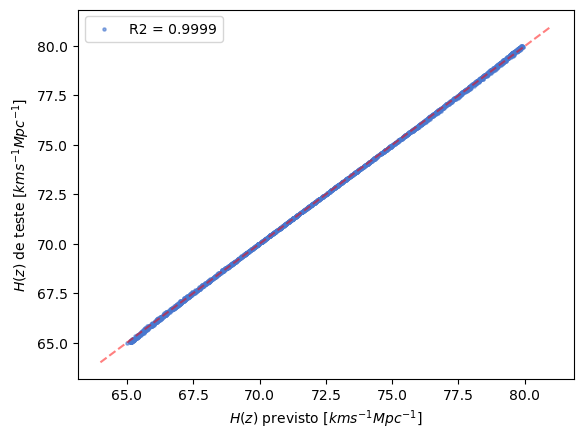

In [5]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)
# linha = np.linspace(.31, .315, 2500)


plt.scatter(y_pred, y_test, s=5, alpha=.6, label=f'R2 = {r2:.4f}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()


plt.xlabel(r'$H (z)$ previsto [$km s^{-1} Mpc^{-1}$] ')
plt.ylabel(r'$H (z)$ de teste [$km s^{-1} Mpc^{-1}$] ')

# plt.savefig("imagens/metrics_h0_tpot")
plt.show()

In [6]:
# forecasting "real" H(0)

real = np.load('../input47/data_real47.npy')
# real = real[real[:, 1].argsort()]

# real = real.reshape(-1,47,2)

In [7]:

final_real = model.predict(real[:,0].reshape(-1,47))
final_real

array([72.26827579])

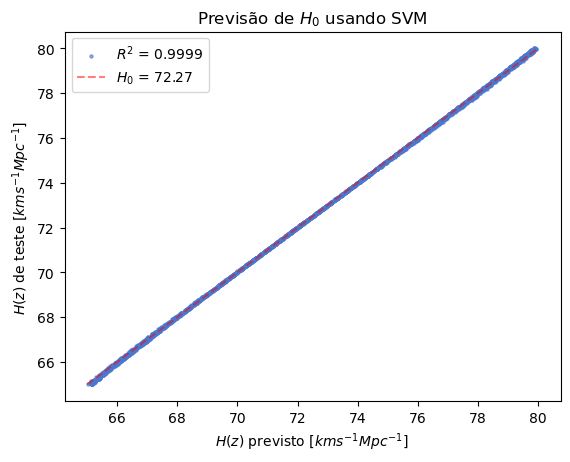

In [9]:
plt.style.use('seaborn-v0_8-muted')

# linha = np.linspace(.3, .35, 2500)
linha = np.linspace(65, 80)

plt.scatter(y_pred, y_test, s=5, alpha=.6, label=(r'$R^2$ '+ f'= {r2:.4f}'))
plt.plot(linha, linha, alpha=.5, c='red', ls='--', label=(r'$H_0$ '+ f'= {final_real[0]:.2f}'))

plt.legend()

plt.title('Previsão de $H_0$ usando SVM')

plt.xlabel(r'$H (z)$ previsto [$km s^{-1} Mpc^{-1}$] ')
plt.ylabel(r'$H (z)$ de teste [$km s^{-1} Mpc^{-1}$] ')


# plt.savefig("../imagens/metrics_h0_rnn")
plt.show()

In [11]:
reg = tpot.TPOTRegressor(max_time_mins=10, generations=5, population_size=20, verbosity=2, random_state=42)


In [12]:
reg.fit(x_train, y_train)

Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


Optimization Progress:  75%|███████▌  | 15/20 [04:26<00:52, 10.42s/pipeline]

  File "c:\Users\Acer\miniconda3\envs\deep\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Acer\miniconda3\envs\deep\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Acer\miniconda3\envs\deep\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Acer\miniconda3\envs\deep\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


                                                                            
10.09 minutes have elapsed. TPOT will close down.                           
TPOT closed during evaluation in one generation.
                                                                            
                                                                            
TPOT closed prematurely. Will use the current best pipeline.
                                                                            
Best pipeline: RidgeCV(input_matrix)


TPOTRegressor(generations=5, max_time_mins=10, population_size=20,
              random_state=42, verbosity=2)

In [13]:
y_pred = reg.predict(x_test)


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

r2

0.9999999468260569

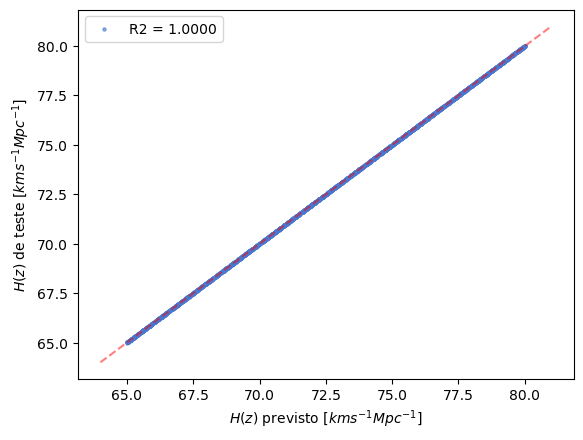

In [14]:
plt.style.use('seaborn-v0_8-muted')

linha = np.linspace(64, 81)
# linha = np.linspace(.31, .315, 2500)


plt.scatter(y_pred, y_test, s=5, alpha=.6, label=f'R2 = {r2:.4f}')
plt.plot(linha, linha, alpha=.5, c='red', ls='--')

plt.legend()


plt.xlabel(r'$H (z)$ previsto [$km s^{-1} Mpc^{-1}$] ')
plt.ylabel(r'$H (z)$ de teste [$km s^{-1} Mpc^{-1}$] ')

# plt.savefig("imagens/metrics_h0_tpot")
plt.show()

In [15]:
# forecasting "real" H(0)

real = np.load('../input47/data_real47.npy')
# real = real[real[:, 1].argsort()]

# real = real.reshape(-1,47,2)

In [16]:

final_real = reg.predict(real[:, 1].reshape(1, -1))
final_real

array([81.56551409])

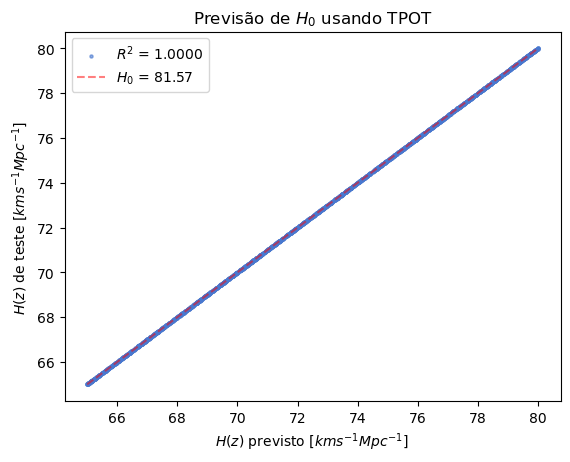

In [18]:
plt.style.use('seaborn-v0_8-muted')

# linha = np.linspace(.3, .35, 2500)
linha = np.linspace(65, 80)

plt.scatter(y_pred, y_test, s=5, alpha=.6, label=(r'$R^2$ '+ f'= {r2:.4f}'))
plt.plot(linha, linha, alpha=.5, c='red', ls='--', label=(r'$H_0$ '+ f'= {final_real[0]:.2f}'))

plt.legend()

plt.title('Previsão de $H_0$ usando TPOT')

plt.xlabel(r'$H (z)$ previsto [$km s^{-1} Mpc^{-1}$] ')
plt.ylabel(r'$H (z)$ de teste [$km s^{-1} Mpc^{-1}$] ')


# plt.savefig("../imagens/metrics_h0_rnn")
plt.show()

In [ ]:
# def permutation_importance_sklearn(model, X_test, y_test, metric=mean_squared_error, n_repeats=1):
# 	"""
# 	Calcula a importância de cada feature via permutação (compatível com modelos scikit-learn).
# 	"""
# 	base_pred = model.predict(X_test)
# 	base_score = metric(y_test, base_pred)

# 	importances = np.zeros(X_test.shape[1])

# 	for feature_idx in range(X_test.shape[1]):
# 		scores = []
# 		for _ in range(n_repeats):
# 			X_permuted = X_test.copy()
# 			np.random.shuffle(X_permuted[:, feature_idx])
# 			perm_pred = model.predict(X_permuted)
# 			perm_score = metric(y_test, perm_pred)
# 			scores.append(perm_score)
# 		importances[feature_idx] = np.mean(scores) - base_score

# 	return importances


# def plot_feature_importance_colored_sk(importances):
# 	"""
# 	Plota a importância das features com coloração baseada na magnitude.
# 	# """
# 	features = np.arange(len(importances))  # Índices das features
	
# 	# Normaliza a importância para mapear nas cores
# 	norm = plt.Normalize(min(importances), max(importances))
# 	cmap = plt.cm.viridis
# 	colors = cmap(norm(importances))

# 	fig, ax = plt.subplots(figsize=(14, 5))
# 	bars = ax.bar(features, importances, width=0.6, color=colors, edgecolor='black')

# 	# Adiciona a colorbar
# 	sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# 	sm.set_array([])
# 	cbar = fig.colorbar(sm, ax=ax)
# 	cbar.set_label('Importância relativa', fontsize=14)

# 	ax.set_title('Permutation Importance', fontdict={'fontsize':14})
# 	ax.set_xlabel('Redshift (z)', fontdict={'fontsize':14})
# 	ax.set_ylabel('Queda de desempenho', fontdict={'fontsize':14})
# 	# ax.set_xticks(np.linspace(.1, 1.5, 7), np.round(np.linspace(.1, 1.5, 7), 2))
# 	ax.grid(axis='y', linestyle='--', alpha=0.6)
	
# 	plt.xticks(np.linspace(1, 80, 8), np.round(np.linspace(.1, 1.5, 8), 2))

# 	plt.tight_layout()
# 	plt.show()

In [ ]:
# importances = permutation_importance_sklearn(reg, x, y)


In [ ]:
# plot_feature_importance_colored_sk(importances)

In [ ]:
# y_pred = model.predict(x_test)


# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)


In [ ]:
# plt.style.use('seaborn-v0_8-muted')

# linha = np.linspace(64, 81)


# plt.scatter(y_pred*norm, y_test*norm, s=5, alpha=.6, label=f'MAE = {mae:.3e}\nR2 = {r2:.4e}\nMSE = {mse:.3e}\nRMSE = {rmse:.3e}')
# plt.plot(linha, linha, alpha=.5, c='red', ls='--')

# plt.legend()
# plt.savefig("imagens/metrics_h0_tree")

# plt.show()

In [ ]:
# # forecasting "real" H(0)

# real = np.load('input/data_real80.npy')
# real = real[real[:, 1].argsort()]

# real = real.reshape(1, 160)

In [ ]:

# final_real = model.predict(real)

In [ ]:
# final_real*norm

In [ ]:
# x_test.shape

In [ ]:
# import joblib


# joblib.dump(model, "models/svm.pkl") 